In [1]:
import Quandl
import os
import pandas

# not sure if you actually need authtoken's anymore for small amounts of data
authtoken = None

def get_data(storefile=None, storekey=None, tickers=None):
    if not os.path.exists(storefile):
        print("getting data from quandl")
        d = dict()
        for ticker in tickers:
            d[ticker] = Quandl.get(ticker, authtoken=authtoken)
            print(ticker, d[ticker].shape)
        df = pandas.Panel(d)
        print('saving to %s.%s' % (storefile, storekey))
        df.to_hdf(storefile, storekey)
    else:
        print('reading %s.%s' % (storefile, storekey))
        df = pandas.read_hdf(storefile, storekey)
    print('shape is %s' % (df.shape,))
    return(df)

def get_cl_data():
    tickers = ['SCF/CME_CL%d_FW' % i for i in range(1, 10)]
    storefile='CME_CL_FW.h5'
    storekey='data'
    return(get_data(**locals()))
    
def get_swap_data():
    tickers = ['FRED/DSWP%d' % i for i in [1, 2, 3, 5, 7, 10]]
    storefile='FRED_DSWP.h5'
    storekey='data'
    return(get_data(**locals()))    

data_cl = get_cl_data()
data_swaps = get_swap_data()

reading CME_CL_FW.h5.data
shape is (9, 8015, 6)
reading FRED_DSWP.h5.data
shape is (6, 3666, 1)


Populating the interactive namespace from numpy and matplotlib
(3666, 6)


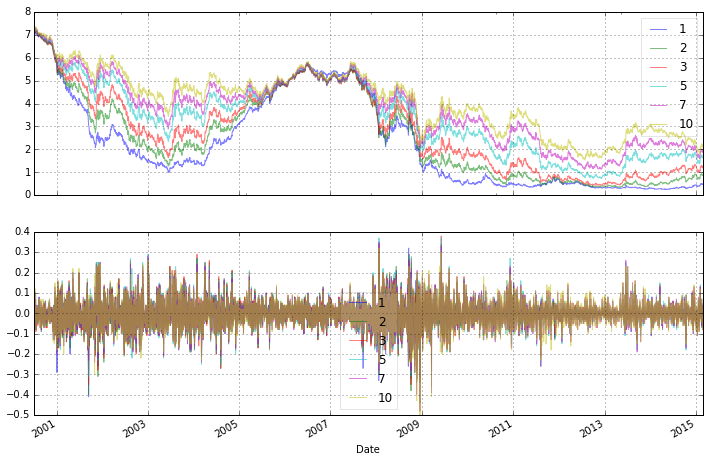

In [4]:
%pylab inline

def do_plot(df):
    figure(figsize=(12, 8))
    ax = subplot(211)
    p = df.plot(ax=ax, alpha=0.5)
    gca().get_legend().get_frame().set_alpha(.1)
    ax = subplot(212)
    p = df.diff().plot(ax=ax, alpha=0.5)
    gca().get_legend().get_frame().set_alpha(.1)
    
# df = data_cl.loc[:,:,'Settle']
# do_plot(df)

df = data_swaps.loc[:,:,'Value']
df.columns = [int(x.split('DSWP')[-1]) for x in df.columns]
df = df.sort_index(axis=1)
do_plot(df)

print(df.shape)

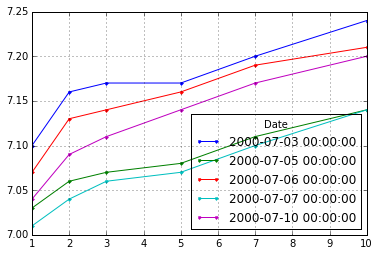

In [7]:
df.head().T.plot(style='.-')